# Adversarial Goodhart

Adversarial Goodhart happens when agents actively make our proxy worse by intelligently manipulating it.

## Example
Suppose we're picking players for our basketball team. We know that height is correlated with basketball skill.

Text(0, 0.5, 'Height')

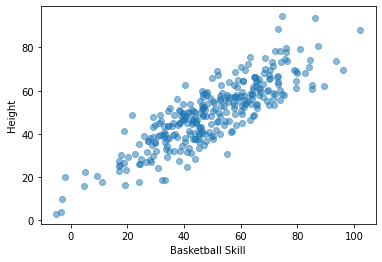

In [7]:
import numpy as np
import matplotlib.pyplot as plt

num_players = 300
height = np.random.normal(loc=50, scale=15, size=num_players)
other_factors = np.random.normal(loc=0, scale=10, size=num_players)
basketball_skill = height + other_factors

plt.scatter(x=basketball_skill, y=height, alpha=0.5)
plt.xlabel('Basketball Skill')
plt.ylabel('Height')

So, naturally, we decide to use height as a proxy for basketball skill. Let's pick an arbitrary cutoff height and select all players taller than that.

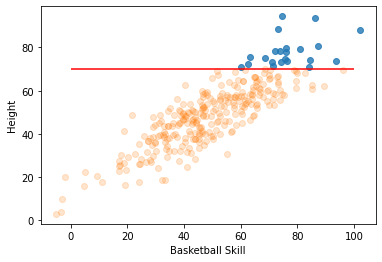

In [8]:
cutoff_height = 70
tall_people = [(x, y) for x, y in zip(basketball_skill, height) if y >= cutoff_height]
short_people = [(x, y) for x, y in zip(basketball_skill, height) if y <= cutoff_height]
plt.scatter(x=[k[0] for k in tall_people], y=[k[1] for k in tall_people], alpha=0.8)
plt.scatter(x=[k[0] for k in short_people], y=[k[1] for k in short_people], alpha=0.2)
plt.xlabel('Basketball Skill')
plt.ylabel('Height')
plt.hlines(y=70, xmin=0, xmax=100, color='red')

It looks like we did pretty well! We didn't get all the best basketball players and some of our picks aren't very good at basketball, but overall this is a solid team. But what happens once people realize we use height to pick our players? They might decide to exaggerate their height, possibly by wearing high heels, or getting bone transplants, or any other crazy idea! Let's plot what it looks like when one person decides to exaggerate their height.

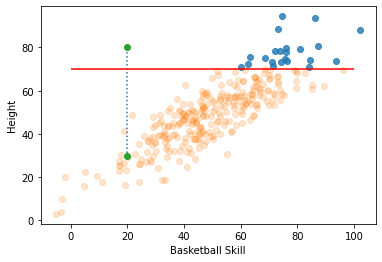

In [9]:
person_before_exaggeration = (20, 30)
person_after_exaggeration = (20, 30 + 50)

cutoff_height = 70
tall_people = [(x, y) for x, y in zip(basketball_skill, height) if y >= cutoff_height]
short_people = [(x, y) for x, y in zip(basketball_skill, height) if y <= cutoff_height]
plt.scatter(x=[k[0] for k in tall_people], y=[k[1] for k in tall_people], alpha=0.8)
plt.scatter(x=[k[0] for k in short_people], y=[k[1] for k in short_people], alpha=0.2)
plt.scatter(x=[20, 20], y=[30, 80], alpha=1)
plt.vlines(x=20, ymin=31, ymax=79, linestyles='dotted')
plt.xlabel('Basketball Skill')
plt.ylabel('Height')
plt.hlines(y=70, xmin=0, xmax=100, color='red')

You can see that even though the player hasn't gotten better at basketball, they still made the cutoff. You can imagine how bad this would be if even *more* players decided to exaggerate their height. Then height would be completely useless as a proxy for skill!